# 1. Inception Models v1

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers as tkl
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [3]:
reshaped_X_train = list()
reshaped_X_test = list()

for image in range(len(X_train)):
    im = Image.fromarray(X_train[image])
    im = im.resize((96, 96))
    reshaped_X_train.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_train)), end = "\r")
reshaped_X_train = np.array(reshaped_X_train)
print("\033[92m'TRAIN' dataset reshaped.")

for image in range(len(X_test)):
    im = Image.fromarray(X_test[image])
    im = im.resize((96, 96))
    reshaped_X_test.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_test)), end = "\r")
reshaped_X_test = np.array(reshaped_X_test)
print("\033[92m'TEST' dataset reshaped.")

'TRAIN' dataset reshaped.


'TEST' dataset reshaped.


In [4]:
X_train = X_train / 255
X_test = X_test / 255

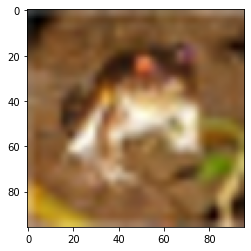

In [5]:
plt.imshow(reshaped_X_train[0])

# 1. Inception Network v1

In [6]:
def inception_module(X, x1, x3_reduce, x3, x5_reduce, x5, pool_proj, name = None, initializer = "he_normal"):
    conv2d_1x1 = tkl.Conv2D(x1, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    
    conv2d_3x3_reduce = tkl.Conv2D(x3_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_3x3 = tkl.Conv2D(x3, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_3x3_reduce)
    
    conv2d_5x5_reduce = tkl.Conv2D(x5_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_5x5 = tkl.Conv2D(x5, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_5x5_reduce)
    
    maxpool2d = tkl.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = "same")(X)
    pool_proj = tkl.Conv2D(pool_proj, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(maxpool2d)
    
    output = tkl.Concatenate(axis = 3, name = name)([conv2d_1x1, conv2d_3x3, conv2d_5x5, pool_proj])
    return output

In [12]:
def inception_v1(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I2)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(1000, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model
    

In [13]:
inception_model_v1 = inception_v1()

In [14]:
history = inception_model_v1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25)

Epoch 1/25


2022-10-20 19:30:28.097589: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.6312 - accuracy: 0.3887

2022-10-20 19:30:59.741246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 35s 22ms/step - loss: 1.6312 - accuracy: 0.3887 - val_loss: 1.3681 - val_accuracy: 0.5001
Epoch 2/25
1563/1563 [==============================] - 33s 21ms/step - loss: 1.2837 - accuracy: 0.5299 - val_loss: 1.1399 - val_accuracy: 0.5883
Epoch 3/25
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1061 - accuracy: 0.6012 - val_loss: 1.1094 - val_accuracy: 0.5956
Epoch 4/25
1563/1563 [==============================] - 34s 21ms/step - loss: 0.9697 - accuracy: 0.6525 - val_loss: 0.9628 - val_accuracy: 0.6620
Epoch 5/25
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8690 - accuracy: 0.6903 - val_loss: 0.8627 - val_accuracy: 0.6985
Epoch 6/25
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7942 - accuracy: 0.7179 - val_loss: 0.8517 - val_accuracy: 0.7021
Epoch 7/25
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7298 - accuracy: 0.7414 - val_loss: 0.8125 - val_accura

In [18]:
pred = inception_model_v1.predict(X_test)

2022-10-20 19:52:07.353725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 7ms/step


In [65]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(pred, axis = 1), 10)

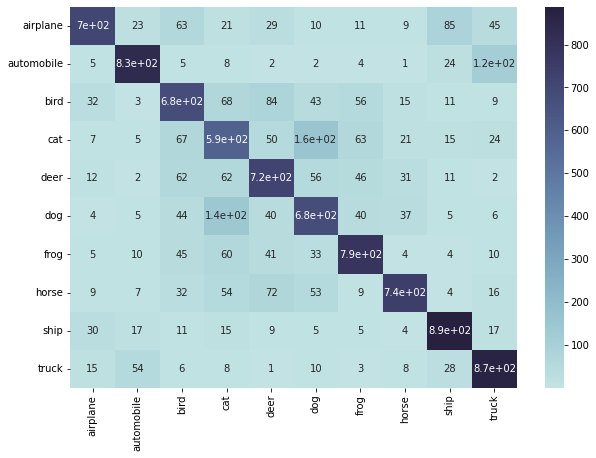

In [66]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

# 2. Inception Network v2 - Transfer Learning

In [71]:
base_model = keras.applications.inception_v3.InceptionV3(include_top = False, input_shape = (96, 96, 3))

In [72]:
v2_A1 = tkl.Conv2D(512, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu")(base_model.output)
v2_D1 = tkl.Dense(512, activation = "relu", name = "dense_1")(v2_A1)
v2_output = tkl.Dense(10, activation = "softmax", name = "output")(v2_D1)

In [73]:
inception_model_v2 = keras.Model(base_model.input, v2_output, name = "InceptionV2")

In [74]:
inception_model_v2.summary()

Model: "InceptionV2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 conv2d_944 (Conv2D)            (None, 47, 47, 32)   864         ['input_11[0][0]']               
                                                                                                  
 batch_normalization_940 (Batch  (None, 47, 47, 32)  96          ['conv2d_944[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_940 (Activation)    (None, 47, 47, 32)   0           ['batch_normalization_9

                                                                                                  
 batch_normalization_950 (Batch  (None, 9, 9, 96)    288         ['conv2d_954[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_951 (Batch  (None, 9, 9, 32)    96          ['conv2d_955[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_945 (Activation)    (None, 9, 9, 64)     0           ['batch_normalization_945[0][0]']
                                                                                                  
 activation_947 (Activation)    (None, 9, 9, 64)     0           ['batch_normalization_947[0][0]']
          

                                                                                                  
 conv2d_964 (Conv2D)            (None, 9, 9, 48)     13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_967 (Conv2D)            (None, 9, 9, 96)     55296       ['activation_962[0][0]']         
                                                                                                  
 batch_normalization_960 (Batch  (None, 9, 9, 48)    144         ['conv2d_964[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_963 (Batch  (None, 9, 9, 96)    288         ['conv2d_967[0][0]']             
 Normalization)                                                                                   
          

                                                                  'activation_969[0][0]',         
                                                                  'max_pooling2d_42[0][0]']       
                                                                                                  
 conv2d_978 (Conv2D)            (None, 4, 4, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_974 (Batch  (None, 4, 4, 128)   384         ['conv2d_978[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_974 (Activation)    (None, 4, 4, 128)    0           ['batch_normalization_974[0][0]']
                                                                                                  
 conv2d_97

 batch_normalization_984 (Batch  (None, 4, 4, 160)   480         ['conv2d_988[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_984 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_984[0][0]']
                                                                                                  
 conv2d_989 (Conv2D)            (None, 4, 4, 160)    179200      ['activation_984[0][0]']         
                                                                                                  
 batch_normalization_985 (Batch  (None, 4, 4, 160)   480         ['conv2d_989[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_999 (Conv2D)            (None, 4, 4, 160)    179200      ['activation_994[0][0]']         
                                                                                                  
 batch_normalization_995 (Batch  (None, 4, 4, 160)   480         ['conv2d_999[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_995 (Activation)    (None, 4, 4, 160)    0           ['batch_normalization_995[0][0]']
                                                                                                  
 conv2d_995 (Conv2D)            (None, 4, 4, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_1000 (Conv2D)           (None, 4, 4, 160)    179200      ['activation_995[0][0]']         
          

                                                                                                  
 activation_1005 (Activation)   (None, 4, 4, 192)    0           ['batch_normalization_1005[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1005 (Conv2D)           (None, 4, 4, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_1010 (Conv2D)           (None, 4, 4, 192)    258048      ['activation_1005[0][0]']        
                                                                                                  
 batch_normalization_1001 (Batc  (None, 4, 4, 192)   576         ['conv2d_1005[0][0]']            
 hNormalization)                                                                                  
          

                                                                                                  
 conv2d_1017 (Conv2D)           (None, 4, 4, 192)    258048      ['activation_1012[0][0]']        
                                                                                                  
 batch_normalization_1013 (Batc  (None, 4, 4, 192)   576         ['conv2d_1017[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1013 (Activation)   (None, 4, 4, 192)    0           ['batch_normalization_1013[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1014 (Conv2D)           (None, 4, 4, 192)    147456      ['mixed7[0][0]']                 
          

 conv2d_1020 (Conv2D)           (None, 1, 1, 320)    409600      ['mixed8[0][0]']                 
                                                                                                  
 batch_normalization_1018 (Batc  (None, 1, 1, 384)   1152        ['conv2d_1022[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1019 (Batc  (None, 1, 1, 384)   1152        ['conv2d_1023[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1022 (Batc  (None, 1, 1, 384)   1152        ['conv2d_1026[0][0]']            
 hNormalization)                                                                                  
          

 average_pooling2d_98 (AverageP  (None, 1, 1, 2048)  0           ['mixed9[0][0]']                 
 ooling2D)                                                                                        
                                                                                                  
 conv2d_1029 (Conv2D)           (None, 1, 1, 320)    655360      ['mixed9[0][0]']                 
                                                                                                  
 batch_normalization_1027 (Batc  (None, 1, 1, 384)   1152        ['conv2d_1031[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1028 (Batc  (None, 1, 1, 384)   1152        ['conv2d_1032[0][0]']            
 hNormalization)                                                                                  
          

In [75]:
inception_model_v2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

In [76]:
inception_model_v2.fit(reshaped_X_train, y_train, validation_data = (reshaped_X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-21 01:43:01.072472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.4252 - accuracy: 0.1054

2022-10-21 01:50:09.056273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 453s 272ms/step - loss: 1.4252 - accuracy: 0.1054 - val_loss: 2.3652 - val_accuracy: 0.1123
Epoch 2/3
1563/1563 [==============================] - 414s 264ms/step - loss: 0.9665 - accuracy: 0.1109 - val_loss: 2.5628 - val_accuracy: 0.1137
Epoch 3/3
1563/1563 [==============================] - 416s 266ms/step - loss: 0.8219 - accuracy: 0.1132 - val_loss: 1.0402 - val_accuracy: 0.1187


In [78]:
predictions = inception_model_v2.predict(reshaped_X_test)

313/313 [==============================] - 16s 50ms/step


In [93]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 3).flatten(), 10)

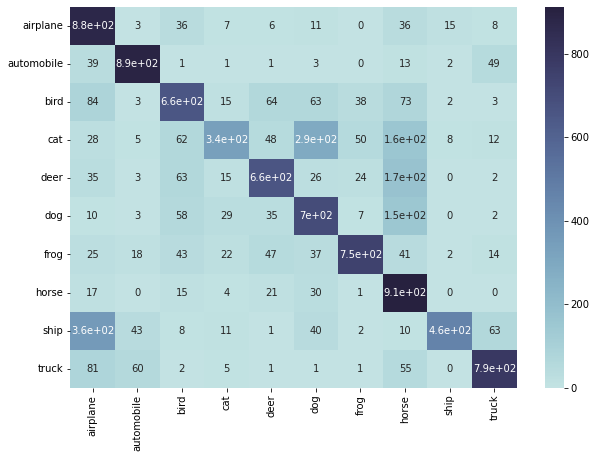

In [94]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

# Inception Network v3  - Random

In [115]:
random = np.random.randint(10, size = 10000)

In [125]:
print("Random Accuracy =", np.count_nonzero(random == y_test) / 10000)

Random Accuracy = 0.1019


In [123]:
confusion_matrix = tf.math.confusion_matrix(y_test, random, 10)

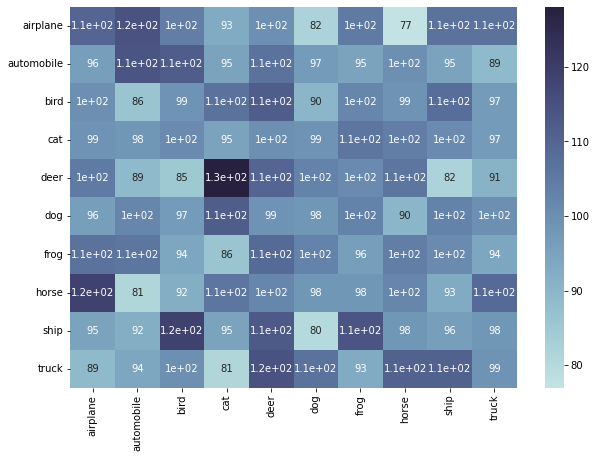

In [124]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

# Inception Network v4 - 4

In [7]:
def inception_v4(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P3)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [9]:
inception_model_v4 = inception_v4()

In [10]:
history_v4 = inception_model_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-21 09:32:50.908246: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 09:32:52.001220: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.6068 - accuracy: 0.4031

2022-10-21 09:33:44.278323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 58s 36ms/step - loss: 1.6068 - accuracy: 0.4031 - val_loss: 1.4676 - val_accuracy: 0.4613
Epoch 2/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2269 - accuracy: 0.5581 - val_loss: 1.0566 - val_accuracy: 0.6178
Epoch 3/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0429 - accuracy: 0.6303 - val_loss: 0.9745 - val_accuracy: 0.6564
Epoch 4/50
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9193 - accuracy: 0.6767 - val_loss: 0.9459 - val_accuracy: 0.6630
Epoch 5/50
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8276 - accuracy: 0.7082 - val_loss: 0.9180 - val_accuracy: 0.6761
Epoch 6/50
1563/1563 [==============================] - 54s 34ms/step - loss: 0.7499 - accuracy: 0.7386 - val_loss: 0.8482 - val_accuracy: 0.7064
Epoch 7/50
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6845 - accuracy: 0.7602 - val_loss: 0.8123 - val_accura

In [11]:
predictions = inception_model_v4.predict(X_test)

2022-10-21 10:17:11.688460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 10ms/step


In [23]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

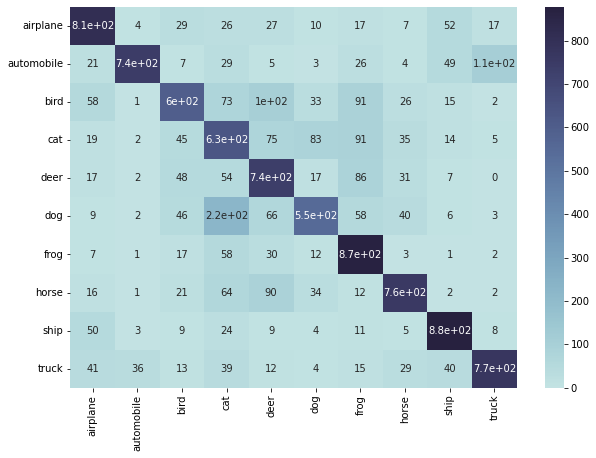

In [24]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

# Inception v5 - 6

In [7]:
def inception_v5(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    I5 = inception_module(P3, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_4")(I6)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P4)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [8]:
inception_model_v5 = inception_v5()

Metal device set to: Apple M1 Pro


2022-10-21 11:18:37.358962: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 11:18:37.359205: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
history_v5 = inception_model_v5.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-21 11:18:41.896171: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 11:18:42.995065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.6894 - accuracy: 0.3675

2022-10-21 11:19:43.200101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 66s 41ms/step - loss: 1.6894 - accuracy: 0.3675 - val_loss: 1.4785 - val_accuracy: 0.4581
Epoch 2/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3247 - accuracy: 0.5186 - val_loss: 1.1875 - val_accuracy: 0.5664
Epoch 3/50
1563/1563 [==============================] - 65s 41ms/step - loss: 1.1511 - accuracy: 0.5848 - val_loss: 1.2499 - val_accuracy: 0.5525
Epoch 4/50
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0268 - accuracy: 0.6342 - val_loss: 1.0816 - val_accuracy: 0.6162
Epoch 5/50
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9281 - accuracy: 0.6744 - val_loss: 1.0306 - val_accuracy: 0.6382
Epoch 6/50
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8594 - accuracy: 0.6980 - val_loss: 0.9521 - val_accuracy: 0.6733
Epoch 7/50
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7900 - accuracy: 0.7250 - val_loss: 1.0473 - val_accura

In [10]:
predictions = inception_model_v5.predict(X_test)

2022-10-21 12:06:18.089881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 11ms/step


In [11]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

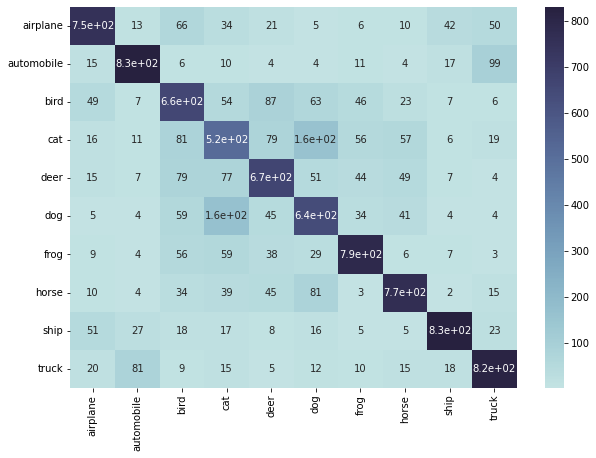

In [12]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

# Inception v6 - 9

In [7]:
def inception_v6(initializer = "he_normal"):
    input_layer = keras.Input(shape = (32, 32, 3), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    I5 = inception_module(I4, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    I7 = inception_module(I6, 256, 160, 320, 32, 128, 128, "inception_4e", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I7)
    
    I8 = inception_module(P4, 256, 160, 320, 32, 128, 128, "inception_5a", initializer = initializer)
    I9 = inception_module(I8, 384, 192, 384, 48, 128, 128, "inception_5b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I9)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [8]:
inception_model_v6 = inception_v6()

2022-10-21 14:32:22.131672: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 14:32:22.131830: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [9]:
history_v6 = inception_model_v6.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-21 14:32:24.594415: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 14:32:25.985990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.8134 - accuracy: 0.2987

2022-10-21 14:33:42.309962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 84s 51ms/step - loss: 1.8134 - accuracy: 0.2987 - val_loss: 1.6501 - val_accuracy: 0.3591
Epoch 2/50
1563/1563 [==============================] - 76s 49ms/step - loss: 1.4366 - accuracy: 0.4681 - val_loss: 1.2978 - val_accuracy: 0.5265
Epoch 3/50
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2456 - accuracy: 0.5467 - val_loss: 1.1583 - val_accuracy: 0.5834
Epoch 4/50
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1209 - accuracy: 0.5975 - val_loss: 1.1249 - val_accuracy: 0.6006
Epoch 5/50
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0152 - accuracy: 0.6383 - val_loss: 1.0403 - val_accuracy: 0.6344
Epoch 6/50
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9397 - accuracy: 0.6705 - val_loss: 1.0210 - val_accuracy: 0.6479
Epoch 7/50
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8674 - accuracy: 0.6969 - val_loss: 1.0364 - val_accura

In [10]:
max(history_v6.history["val_accuracy"])

0.7282000184059143

In [11]:
predictions = inception_model_v6.predict(X_test)

2022-10-21 15:36:05.301312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 14ms/step


In [12]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

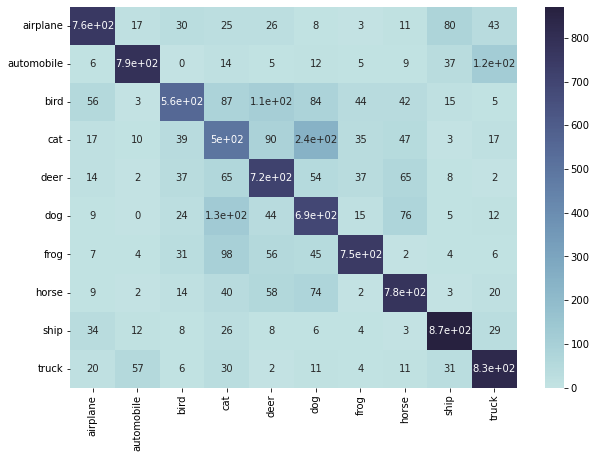

In [13]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()